In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [152]:
import numpy as np
from math import *

def find_best_match(patch, strip):
    """
    Finds the patch in the strip that has the least squared sum of difference
    
    Params:
    patch: Patch to match
    strip: Image strip to search through
    
    Returns: Best position in strip that matches the patch
    """
    num_blocks = strip.shape[1]//patch.shape[1]
    best_x = 0
    min_diff = np.inf
    for i in range(num_blocks):
        x = i*patch.shape[1]
        other_patch = strip[:,x:x+patch.shape[1]]
        diff = np.sum((patch - other_patch)**2)
        if diff < min_diff:
            min_diff = diff
            best_x = x
            
#     print('Min diff : '+str(min_diff))
    return best_x
        
def match_strips(strip_left, strip_right, b):
    """
    Finds disparity between the given strips for a window size 'b'
    
    Params:
    strip_left: Left image strip
    strip_right: Right image strip
    b: Patch width
    """
    n_blocks = strip_left.shape[1]//b
    disparity = np.zeros((strip_left.shape[1], ));
    for i in range(n_blocks):
        x = i*b;
        patch = strip_left[:, x:(x + b)];
        best_x = find_best_match(patch, strip_right);
        disparity[x:(x + b)] = x - best_x

    return disparity
    
    
def disparity_ssd(L, R, window_size = None):
    """Compute disparity map D(y, x) such that: L(y, x) = R(y, x + D(y, x))
    
    Params:
    L: Grayscale left image
    R: Grayscale right image, same size as L
    window_size: Window size

    Returns: Disparity map, same size as L, R
    """
    if window_size is None:
        window_size = (4, 4)
        
    block_height, block_width = window_size
        

    num_strips = L.shape[0]//block_height
#     num_blocks = L.shape[1]//window_size[1]
    
    disparity = np.zeros_like(L)
    for i in range(num_strips):
        y = i * window_size[0]
        left_strip = L[y:y + block_height,:]
        right_strip = R[y:y + block_height,:]
        disparity_strip = match_strips(left_strip, right_strip, block_width)
        disparity[y:y + block_height, :] = disparity_strip

    return np.array(disparity)

def normalize_disparity(D):
    min_d = np.amin(D)
    max_d = np.amax(D)
    return (D - min_d)/(max_d - min_d)*255

L1 = cv2.imread(os.path.join('input', 'pair0-L.png'), 0)/255.  # grayscale, [0, 1]
R1 = cv2.imread(os.path.join('input', 'pair0-R.png'), 0)/255.

D_L1 = disparity_ssd(L1, R1, window_size = (4,4))
D_R1 = disparity_ssd(R1, L1, window_size = (4,4))

(<matplotlib.figure.Figure at 0x115e43c88>,
 <matplotlib.image.AxesImage at 0x116ff0ba8>)

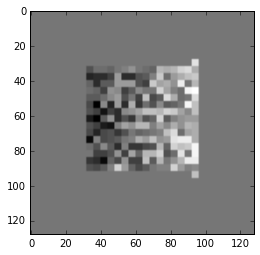

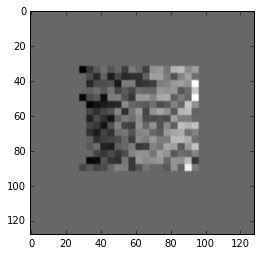

In [153]:
## 1.a
D_L1_norm = normalize_disparity(D_L1)
D_R1_norm = normalize_disparity(D_R1)
cv2.imwrite('output/ps2-1-a-1.png', D_L1_norm)
cv2.imwrite('output/ps2-1-a-2.png', D_R1_norm)
plt.figure(), plt.imshow(D_L1_norm, 'gray')
plt.figure(), plt.imshow(D_R1_norm, 'gray')

(<matplotlib.figure.Figure at 0x117423278>,
 <matplotlib.image.AxesImage at 0x11c997e48>)

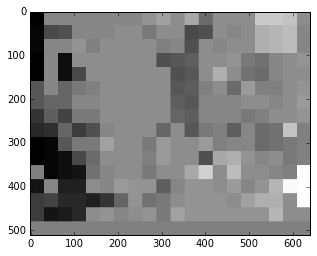

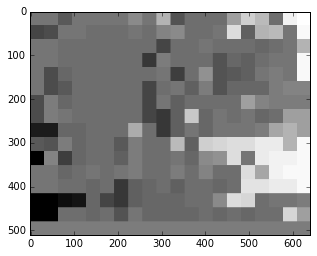

In [156]:
## 2.a
L2 = cv2.imread(os.path.join('input', 'pair1-L.png'), 0)/255.  # grayscale, [0, 1]
R2 = cv2.imread(os.path.join('input', 'pair1-R.png'), 0)/255.

D_L2 = disparity_ssd(L2, R2, window_size = (32,32))
D_R2 = disparity_ssd(R2, L2, window_size = (32,32))
D_L2_norm = normalize_disparity(D_L2)
D_R2_norm = normalize_disparity(D_R2)
plt.figure(), plt.imshow(D_L2_norm, 'gray')
plt.figure(), plt.imshow(D_R2_norm, 'gray')